<a href="https://colab.research.google.com/github/vijay313v/myntra/blob/main/Myntra_Online_Retail_Customer_Segmentation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title : Myntra Online Retail Customer Segmentation.**


## **Business Context**

Myntra is a leading Indian fashion e-commerce company known for its wide range of clothing, accessories, and lifestyle products. While Myntra is recognized primarily for fashion, this dataset relates to the company's online retail operations for Myntra Gifts Ltd., a UK-based division specializing in unique all-occasion giftware. This dataset spans transactions from December 1, 2009, to December 9, 2011, and includes detailed records of sales made through Myntra Gifts Ltd.’s non-store online platform. The dataset provides a thorough snapshot of the company's international online retail activities during this period.

# **Data Description:**

# **Attribute Information:**



**InvoiceNo:** Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates cancellation.

**StockCode:** Product code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.


**Description:** Product (item) name. Nominal.

**Quantity:** The quantities of each product (item) per transaction. Numeric.

**InvoiceDate:** Invice Date and time. Numeric, the day and time when each transaction was generated.
**UnitPrice:** Unit price. Numeric, Product price per unit in sterling.


**CustomerID:** Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.


**Country:** Country name. Nominal, the name of the country where each customer resides.


In [ ]:
#Loading in the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime as dt

from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Load dataset
cs_df = pd.read_excel('/content/Online Retail (1).xlsx')

In [ ]:
#First 5 observations of the dataframe
cs_df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [ ]:
#shape of the dataset
cs_df.shape

(541909, 8)

In [ ]:
#A concise summary of the dataset
cs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


# **Handling Null values :**

In [ ]:
#Checking if the dataset has null values
cs_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
#Dropping the null values in the dataset
cs_df.dropna(inplace=True)

In [ ]:
#Checking if the deletion has worked
cs_df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

# **Handling Duplicate values:**

In [ ]:
#Checking if the data has duplicate values
cs_df.duplicated().sum()

5225

In [ ]:
#Deleting the duplicate values from the data
cs_df.drop_duplicates(inplace=True)

In [ ]:
#Checking if the duplicate deletion has worked
cs_df.duplicated().sum()

0

# **Removing Cancelled Orders:**

In [ ]:

#Obtaining all the cancelled orders
cs_df[cs_df['Quantity']<0]

InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

               InvoiceDate  UnitPrice  CustomerID         Country  
141    2010-12-01 09:41:00      27.50     14527.0  United Kingdom  
154    2010-12-01 09:49:00       4.65     15311.0  United Kingdom  
235    2010-12-01 10:24:00       1.65     17548.0  United Kingdom  
236    2010-12-01 10:24:00       0.29     17548.0  United Kingdom  
237    2010-12-01 10:24:00       0.29     17548.0  United Kingdom  
...                    ...        ...         ...             ...  
540449 2011-12-09 09:57:00       0.83     14397.0  United Kingdom  
541541 2011-12-09 10:28:00     224.69     15498.0  United Kingdom  
541715 2011-12-09 11:57:00      10.95     15311.0  United Kingdom  
541716 2011-12-09 11:58:00       1.25     17315.0  United Kingdom  
541717 2011-12-09 11:58:00       1.25     17315.0  United Kingdom  

[8872 rows x 8 columns]

In [ ]:

# Converting 'InvoiceNo' to string
cs_df['InvoiceNo'] = cs_df['InvoiceNo'].astype(str)

# Checking the number of cancelled orders before removal
cancelled_orders_before_removal = cs_df[cs_df['InvoiceNo'].str.contains('C')]['InvoiceNo'].count()
print(f'Total cancelled orders before removal: {cancelled_orders_before_removal}')


Total cancelled orders before removal: 8872


In [ ]:
# Deleting the cancelled orders
cs_df = cs_df[cs_df['Quantity'] > 0]

In [ ]:
# Checking if the deletion has worked
cancelled_sum_after_removal = cs_df[cs_df['InvoiceNo'].str.contains('C')]['InvoiceNo'].count()
print(f'Total number of cancelled orders after removal: {cancelled_sum_after_removal}')

Total number of cancelled orders after removal: 0


# **Handling Outliers:**

In [ ]:
cs_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
#Defining a list of columns that can contain outliers
out_pos_cols = ['Quantity','UnitPrice']

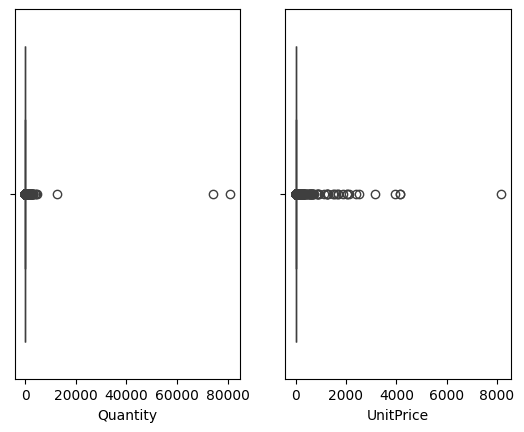

In [ ]:

#Checking for outliers in the data
out_pos_cols = ['Quantity','UnitPrice']          #A list of columns that can possibly contain outliers.
for index, col in enumerate(out_pos_cols):
  plt.subplot(1,2,index+1)
  sns.boxplot(data = cs_df,x=col)

In [ ]:
#Removing columns using the IQR method
def remove_outliers(data:pd.DataFrame,col:str):
  """A function that removes outliers using the IQR method"""

  #Calculating the upper and lower fence
  Q1 = data[col].quantile(0.25)
  Q3 = data[col].quantile(0.75)
  IQR = Q3-Q1
  upper_fence = Q3 + (1.5*IQR)
  lower_fence = Q1 - (1.5*IQR)

  #Deleting elements beyond the upper and lower fence
  if lower_fence<0:
    data = data[data[col]<=upper_fence]
  else:
    data = data[(data[col]>=lower_fence) and (data[col]<=upper_fence)]
  return data

In [ ]:
#Applying the outlier removal function on two of our possible columns
cs_df = remove_outliers(cs_df,'Quantity')
cs_df = remove_outliers(cs_df,'UnitPrice')

In [ ]:
cs_df.shape

(333265, 8)

# **Feature Engineering :**

## **Extracting columns from the InvoiceDate column:**

In [ ]:
#Using the InvoiceDate column to extract different columns
cs_df['Hour'] = cs_df['InvoiceDate'].dt.hour
cs_df['Monthday'] = cs_df['InvoiceDate'].dt.day
cs_df['DayOfWeek'] = cs_df['InvoiceDate'].dt.strftime('%A')
cs_df['Month'] = cs_df['InvoiceDate'].dt.month
cs_df['Year'] = cs_df['InvoiceDate'].dt.year
cs_df['InvoiceDate'] = cs_df['InvoiceDate'].dt.date

In [ ]:
#A look of the dataframe after creating new columns
cs_df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

  InvoiceDate  UnitPrice  CustomerID         Country  Hour  Monthday  \
0  2010-12-01       2.55     17850.0  United Kingdom     8         1   
1  2010-12-01       3.39     17850.0  United Kingdom     8         1   
2  2010-12-01       2.75     17850.0  United Kingdom     8         1   
3  2010-12-01       3.39     17850.0  United Kingdom     8         1   
4  2010-12-01       3.39     17850.0  United Kingdom     8         1   

   DayOfWeek  Month  Year  
0  Wednesday     12  2010  
1  Wednesday     12  2010  
2  Wednesday     12  2010  
3  Wednesday     12  2010  
4  Wednesday     12  2010

# **Creating a Total Amount column**

## **Total amount = Unit Price * Quantity**

In [ ]:
#Creating the total amount column
cs_df['total_amount'] = cs_df['Quantity'] * cs_df['UnitPrice']

In [ ]:
#Dataset summary
cs_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333265 entries, 0 to 541908
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   InvoiceNo     333265 non-null  object 
 1   StockCode     333265 non-null  object 
 2   Description   333265 non-null  object 
 3   Quantity      333265 non-null  int64  
 4   InvoiceDate   333265 non-null  object 
 5   UnitPrice     333265 non-null  float64
 6   CustomerID    333265 non-null  float64
 7   Country       333265 non-null  object 
 8   Hour          333265 non-null  int32  
 9   Monthday      333265 non-null  int32  
 10  DayOfWeek     333265 non-null  object 
 11  Month         333265 non-null  int32  
 12  Year          333265 non-null  int32  
 13  total_amount  333265 non-null  float64
dtypes: float64(3), int32(4), int64(1), object(6)
memory usage: 33.1+ MB


# **Exploratory Data Analysis**

In [ ]:
#Creating a function for visualisation

def create_visualisation(data: pd.DataFrame, x_col: str, y_col: str, title: str, x_label: str, y_label: str,
                         display_value: bool = True, rotation: bool = True):
    """Create a bar plot visualization for the given data."""
    plt.figure(figsize=(10, 10))
    ax = sns.barplot(data=data, x=x_col, y=y_col)
    if display_value:
        for bar in ax.patches:
            ax.annotate(format(bar.get_height(), '.1f'),
                        (bar.get_x() + bar.get_width() / 2., bar.get_height()),
                        ha='center', va='center', xytext=(0, 9), textcoords='offset points')
    if rotation:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
    plt.title(title, size=20)
    plt.xlabel(x_label, size=15)
    plt.ylabel(y_label, size=15)
    plt.show()





# **Most frequently ordered products:**

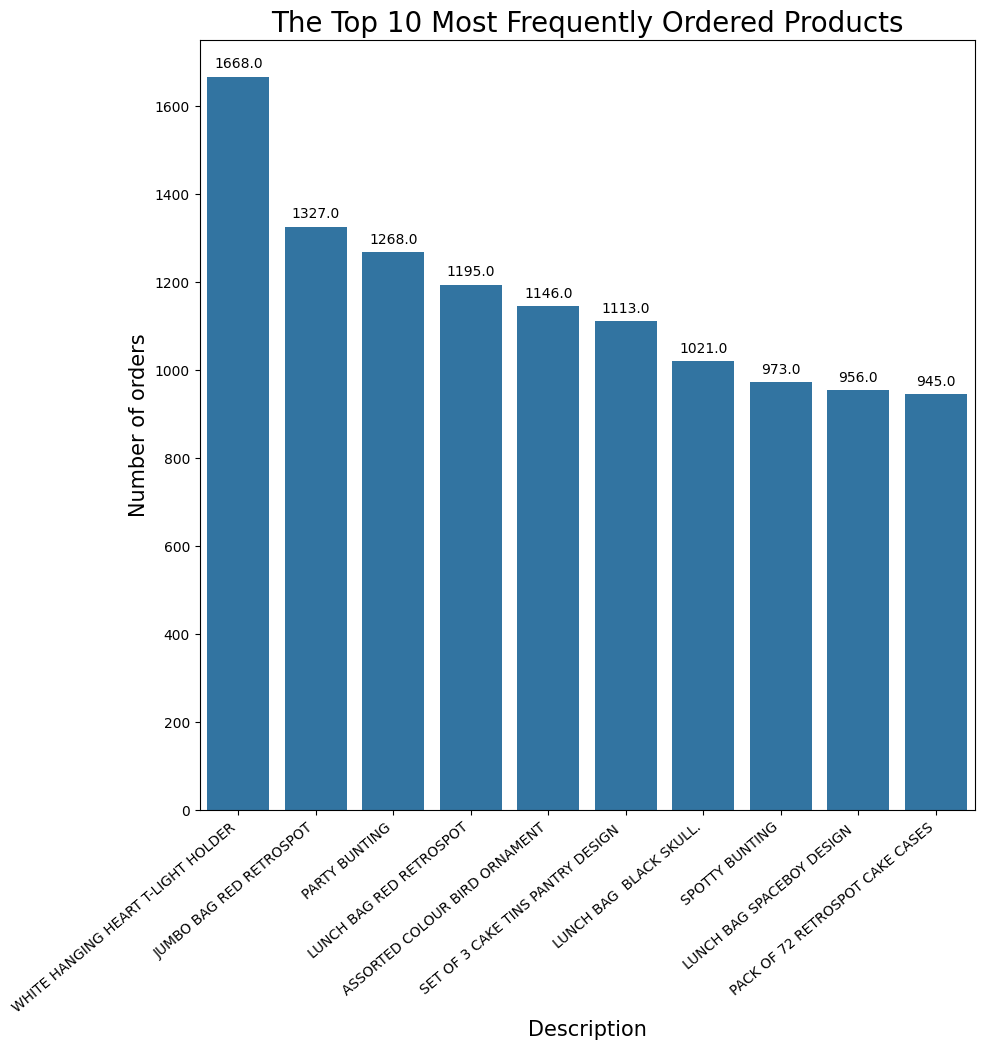

In [ ]:
# Calculate the top 10 most frequently ordered products
top_freq_products = cs_df['Description'].value_counts().reset_index().rename(columns={'index': 'Description', 'Description': 'Counts'})[:10]



# Fixing the column names
top_freq_products.columns = ['Description', 'Counts']


# Visualization
create_visualisation(data=top_freq_products, x_col='Description', y_col='Counts',
                     title='The Top 10 Most Frequently Ordered Products',
                     x_label='Description', y_label='Number of orders')

In [ ]:
print(top_freq_products)

                          Description  Counts
0  WHITE HANGING HEART T-LIGHT HOLDER    1668
1             JUMBO BAG RED RETROSPOT    1327
2                       PARTY BUNTING    1268
3             LUNCH BAG RED RETROSPOT    1195
4       ASSORTED COLOUR BIRD ORNAMENT    1146
5   SET OF 3 CAKE TINS PANTRY DESIGN     1113
6             LUNCH BAG  BLACK SKULL.    1021
7                      SPOTTY BUNTING     973
8          LUNCH BAG SPACEBOY DESIGN      956
9     PACK OF 72 RETROSPOT CAKE CASES     945


**People most frequently order WHITE HANGING HEART T-LIGHT HOLDER of Quantity 1668 and JUMBO BAG RED RETROSPOT of Quantity 1327**

# **Products with the most quantity ordered:**

In [ ]:
top_qty_products=cs_df.groupby('Description')['Quantity'].sum().reset_index().sort_values(by='Quantity',ascending=False)[:10]

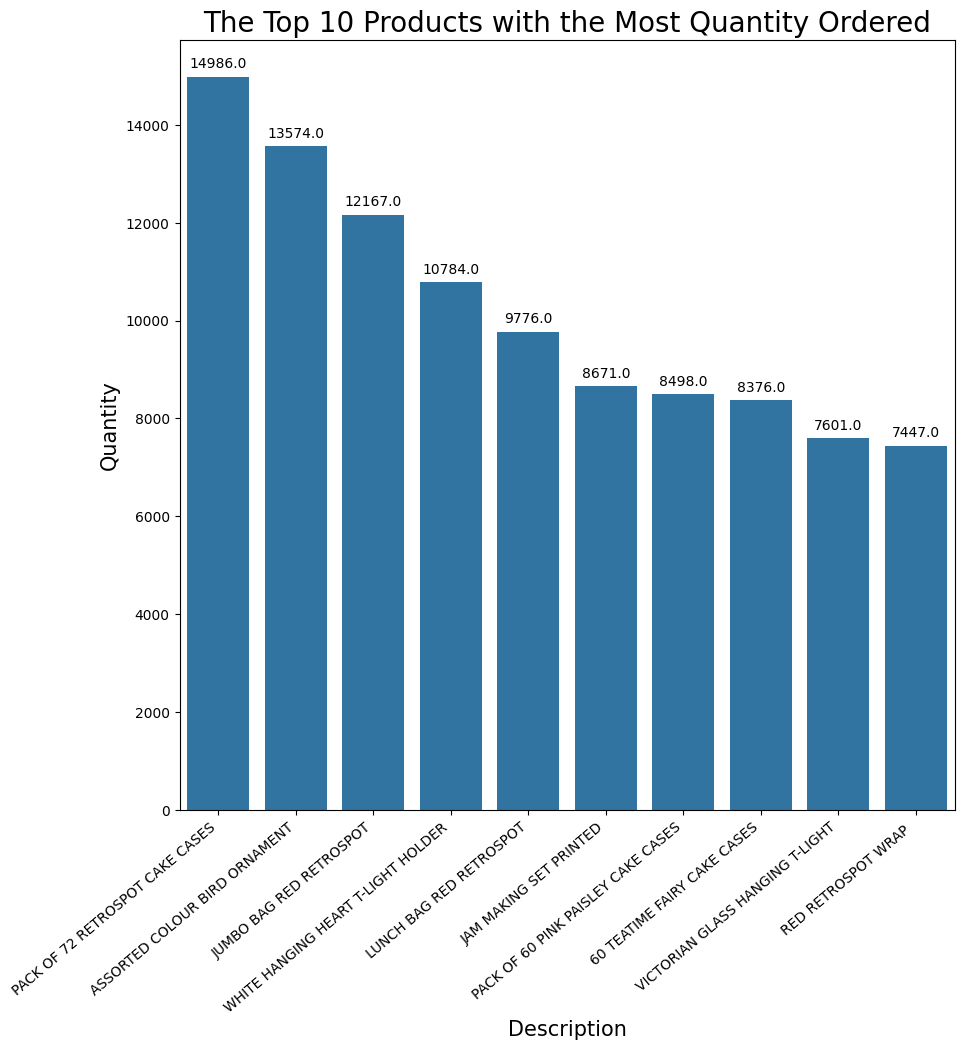

In [ ]:
#visualisation
create_visualisation(data=top_qty_products, x_col='Description', y_col='Quantity',
                     title='The Top 10 Products with the Most Quantity Ordered',
                     x_label='Description', y_label='Quantity')

In [ ]:
print(top_qty_products)

                             Description  Quantity
2092     PACK OF 72 RETROSPOT CAKE CASES     14986
193        ASSORTED COLOUR BIRD ORNAMENT     13574
1626             JUMBO BAG RED RETROSPOT     12167
3414  WHITE HANGING HEART T-LIGHT HOLDER     10784
1790             LUNCH BAG RED RETROSPOT      9776
1592              JAM MAKING SET PRINTED      8671
2090  PACK OF 60 PINK PAISLEY CAKE CASES      8498
98           60 TEATIME FAIRY CAKE CASES      8376
3268     VICTORIAN GLASS HANGING T-LIGHT      7601
2544                 RED RETROSPOT WRAP       7447


**Quantity wise people order PACK OF 72 RETROSPOT CAKE CASES of quantity 14986 and ASSORTED COLOUR BIRD ORNAMENT of quantity 13574**

# **Highest revenue generating products:**

In [ ]:
#Getting top 5 products that generate most revenue
top_revenue_products = cs_df.groupby('Description')['total_amount'].sum().reset_index().sort_values(by='total_amount', ascending=False)[:5]

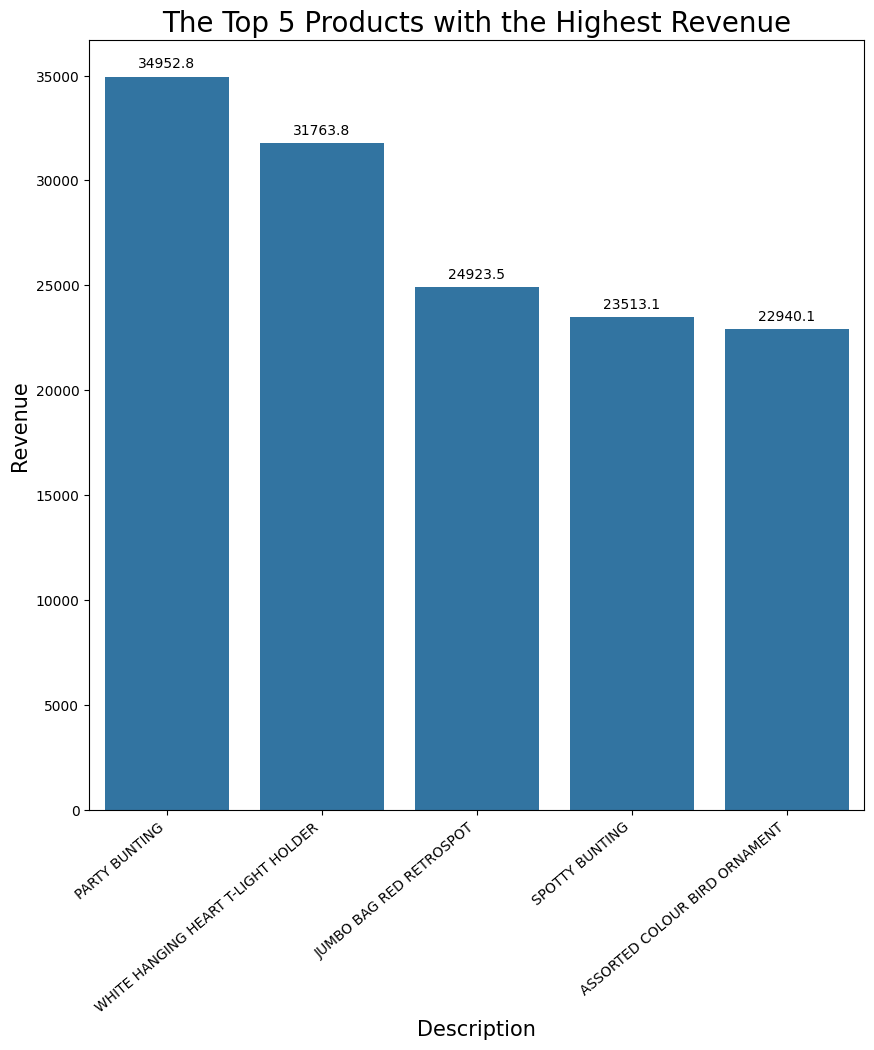

In [ ]:
create_visualisation(data=top_revenue_products, x_col='Description', y_col='total_amount',
                     title='The Top 5 Products with the Highest Revenue',
                     x_label='Description', y_label='Revenue')

In [ ]:
print(top_revenue_products)

                             Description  total_amount
2165                       PARTY BUNTING      34952.85
3414  WHITE HANGING HEART T-LIGHT HOLDER      31763.76
1626             JUMBO BAG RED RETROSPOT      24923.50
3083                      SPOTTY BUNTING      23513.05
193        ASSORTED COLOUR BIRD ORNAMENT      22940.06


**PARTY BUNTING and WHITE HANGING T-LIGHT HOLDER are most revenue generated product.**

# **Top Customers who placed most orders:**

In [ ]:
top_customers=cs_df[cs_df['Quantity']>0].groupby('CustomerID')['InvoiceNo'].nunique().reset_index().sort_values(by='InvoiceNo',ascending=False)[:10]

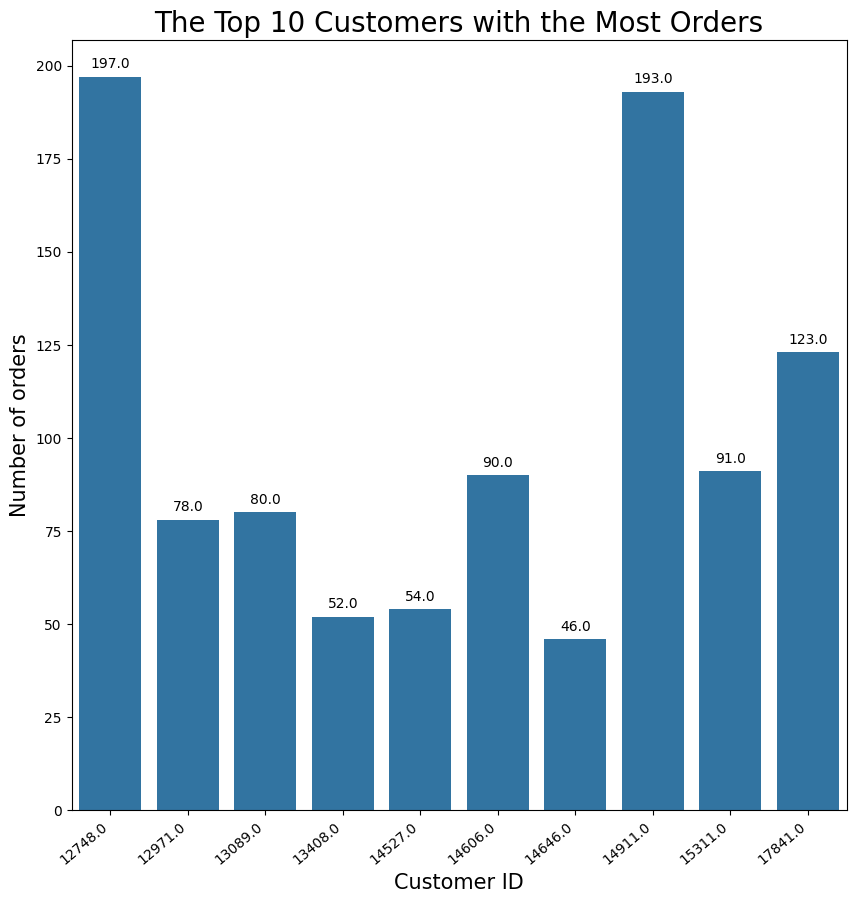

In [ ]:
create_visualisation(data=top_customers, x_col='CustomerID', y_col='InvoiceNo',
                     title='The Top 10 Customers with the Most Orders',
                     x_label='Customer ID', y_label='Number of orders')

In [ ]:
print(top_customers)

      CustomerID  InvoiceNo
324      12748.0        197
1829     14911.0        193
3886     17841.0        123
2114     15311.0         91
1615     14606.0         90
543      13089.0         80
467      12971.0         78
1560     14527.0         54
768      13408.0         52
1642     14646.0         46


# **Countries from which most orders have been made:**

In [ ]:
#Getting the top countries with the most orders
top_countries = cs_df['Country'].value_counts().reset_index().rename(columns={'index':'Country','Country':'Count'})[0:10]

In [ ]:
# Fixing the column names
top_countries.columns = ['Country', 'Count']

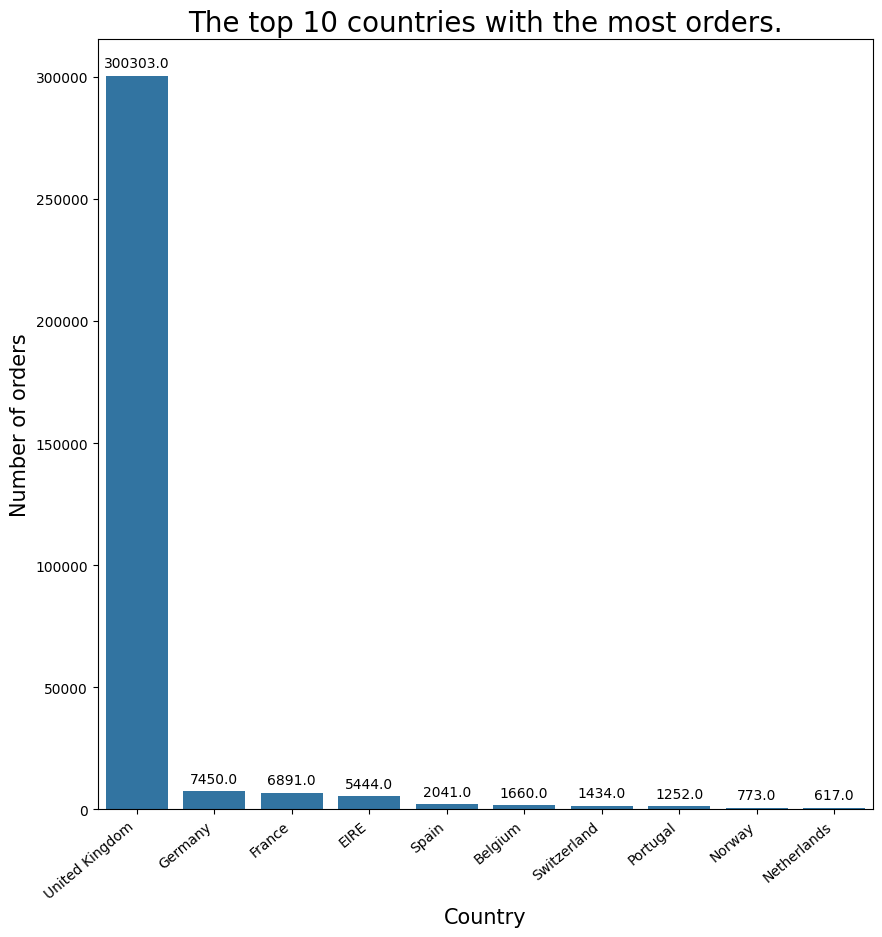

In [ ]:
#Calling the visualisation function
create_visualisation(data=top_countries,x_col='Country',y_col='Count',\
                     title='The top 10 countries with the most orders.',\
                     x_label='Country',y_label='Number of orders')

**People from UNITED KINGDOM place most orders.**

# **Hours for which most orders are made:**

In [ ]:
#Getting the Hour in which the most orders are made
hour_df=cs_df['Hour'].value_counts().reset_index().sort_values(by='Hour',ascending=True)

In [ ]:
#Fixing the column names
hour_df.columns=['Hour','Count']

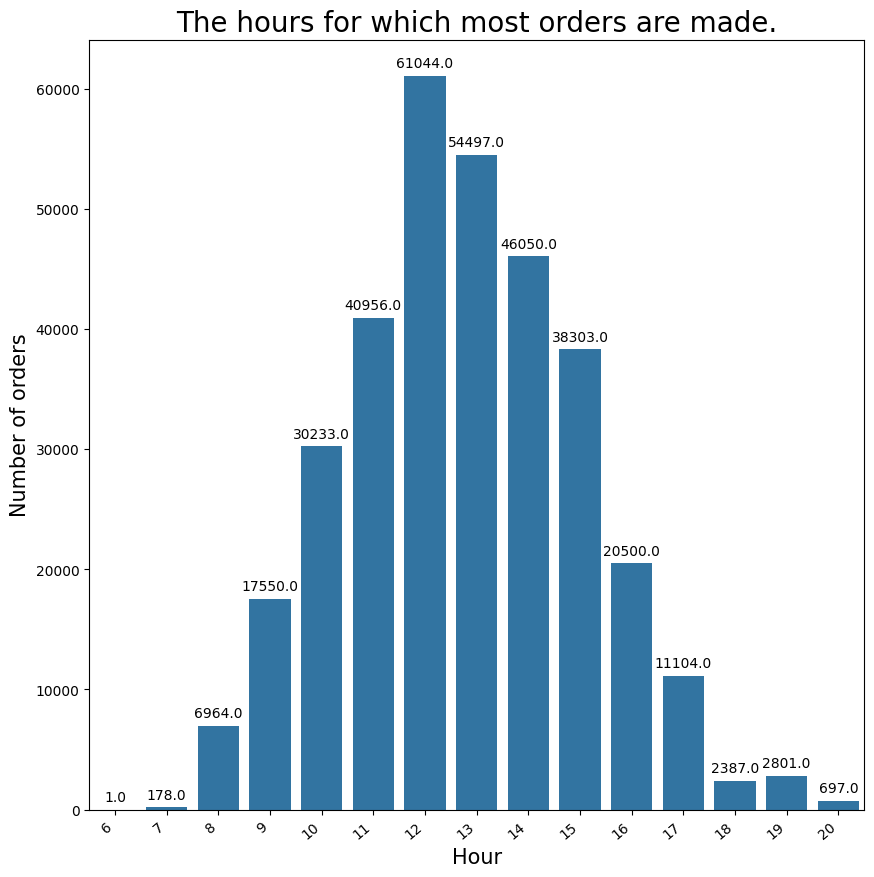

In [ ]:
#Visualisation
create_visualisation(data=hour_df,x_col='Hour',y_col='Count',\
                     title='The hours for which most orders are made.',\
                     x_label='Hour',y_label='Number of orders')

**Most orders are made in the 12th hour, i.e 12pm to 1pm, and the least orders are made in the 6th hour, i.e 6am to 7am. We can see that no orders are made between 8pm and 6am**

# **Day of the month in which most orders made:**

In [ ]:
#Getting the Monthday in which most orders are made
monthday_df=cs_df['Monthday'].value_counts().reset_index().sort_values(by='Monthday',ascending=True)

In [ ]:
#Fixing the column names
monthday_df.columns=['Monthday','Count']

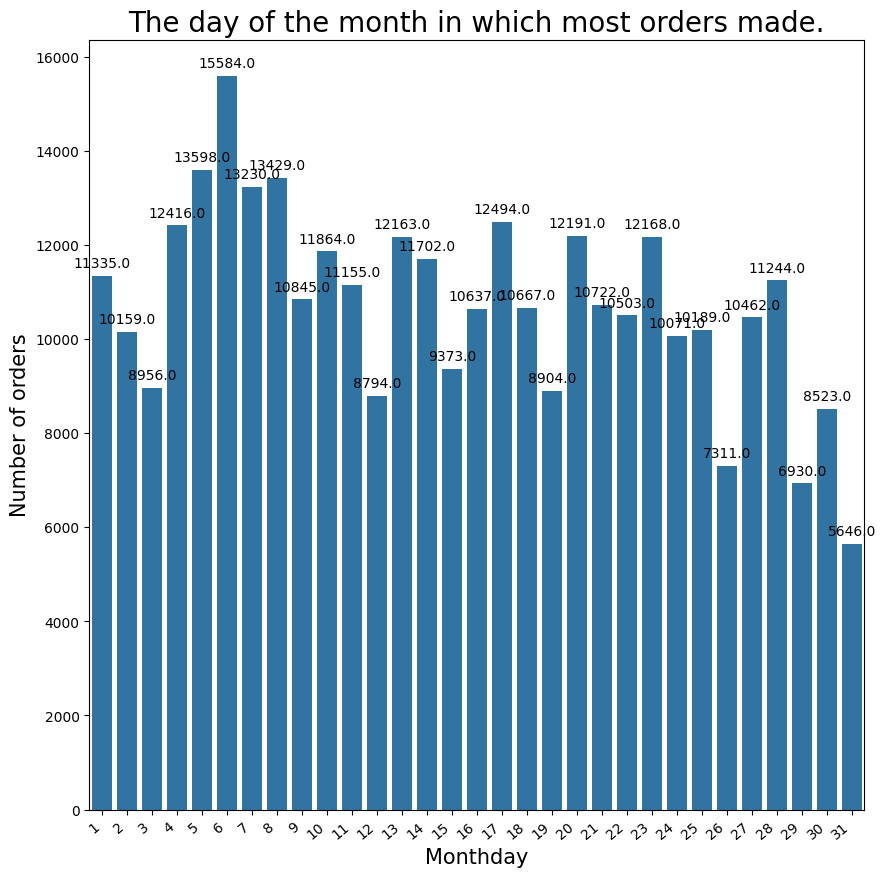

In [ ]:
#Visualisation
create_visualisation(data=monthday_df,x_col='Monthday',y_col='Count',\
                     title='The day of the month in which most orders made.',\
                     x_label='Monthday',y_label='Number of orders')

**6th day of month received most orders and minimum orders received on 31st day**

# **Day of the week in which most orders are made:**

In [ ]:
#Getting DayOfWeek in which most orders are made
day_df=cs_df['DayOfWeek'].value_counts().reset_index().sort_values(by='DayOfWeek',ascending=True)

In [ ]:
#Fixing the column names
day_df.columns=['DayOFWeek','Count']

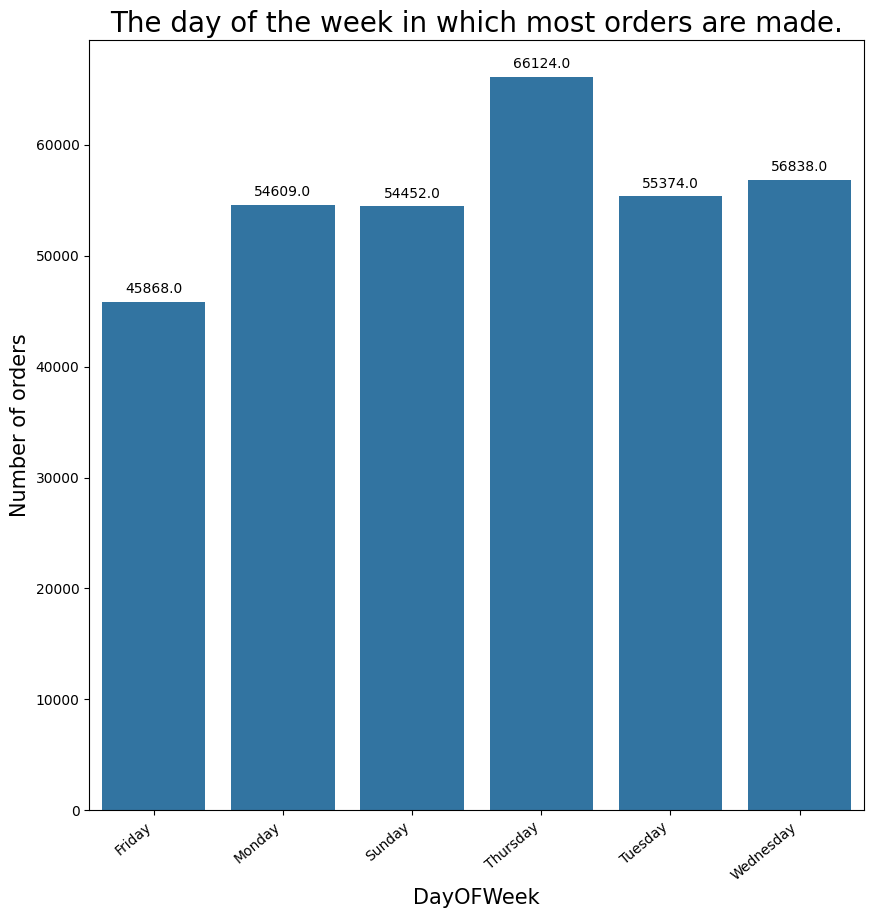

In [ ]:
#visualisation
create_visualisation(data=day_df,x_col='DayOFWeek',y_col='Count',\
                     title='The day of the week in which most orders are made.',\
                     x_label='DayOFWeek',y_label='Number of orders')

**most buying happened on Thursday and least on Friday.**

# **Month in which people order the most:**

In [ ]:
month_df=cs_df['Month'].value_counts().reset_index().sort_values(by='Month',ascending=True)

In [ ]:
month_df.columns=['Month','Count']

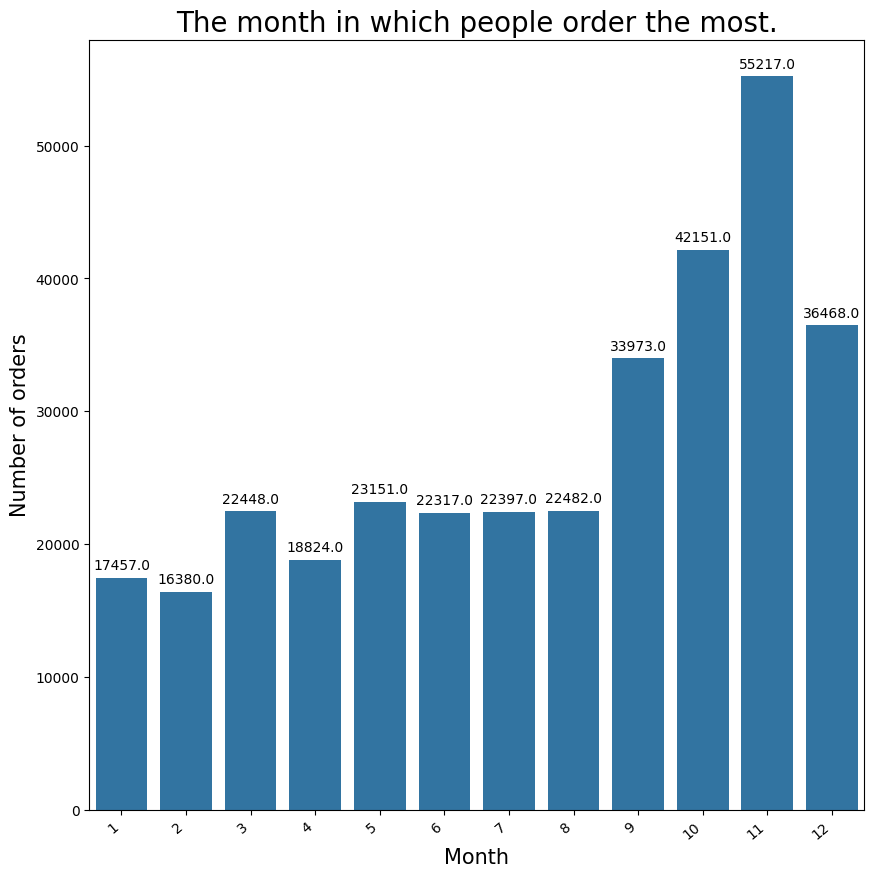

In [ ]:
create_visualisation(data=month_df,x_col='Month',y_col='Count',\
                     title='The month in which people order the most.',\
                     x_label='Month',y_label='Number of orders')

**The most number of orders are made in the 11th month, i.e November, and the least in the 2nd month, i.e February.**

# **Forming the segmentation criteria:**

In [ ]:
cs_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333265 entries, 0 to 541908
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   InvoiceNo     333265 non-null  object 
 1   StockCode     333265 non-null  object 
 2   Description   333265 non-null  object 
 3   Quantity      333265 non-null  int64  
 4   InvoiceDate   333265 non-null  object 
 5   UnitPrice     333265 non-null  float64
 6   CustomerID    333265 non-null  float64
 7   Country       333265 non-null  object 
 8   Hour          333265 non-null  int32  
 9   Monthday      333265 non-null  int32  
 10  DayOfWeek     333265 non-null  object 
 11  Month         333265 non-null  int32  
 12  Year          333265 non-null  int32  
 13  total_amount  333265 non-null  float64
dtypes: float64(3), int32(4), int64(1), object(6)
memory usage: 33.1+ MB


In [ ]:
# Set Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2011, 12, 10)

# Ensure the InvoiceDate column is of datetime type
cs_df['InvoiceDate'] = pd.to_datetime(cs_df['InvoiceDate'])

rfm_df = cs_df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'total_amount': lambda x: x.sum()})


#Rename column names to Recency, Frequency and Monetary
rfm_df.rename(columns={'InvoiceDate': 'Recency',
                         'InvoiceNo': 'Frequency',
                         'total_amount': 'Monetary'}, inplace=True)

rfm_df.reset_index().head()


CustomerID  Recency  Frequency  Monetary
0     12347.0        3        166   3314.73
1     12348.0      249          6     90.20
2     12349.0       19         58    999.15
3     12350.0      311         16    294.40
4     12352.0       37         66   1130.94

In [ ]:
#Creating a list with the columns of the rfm dataframe
rfm_cols = ['Recency','Frequency','Monetary']

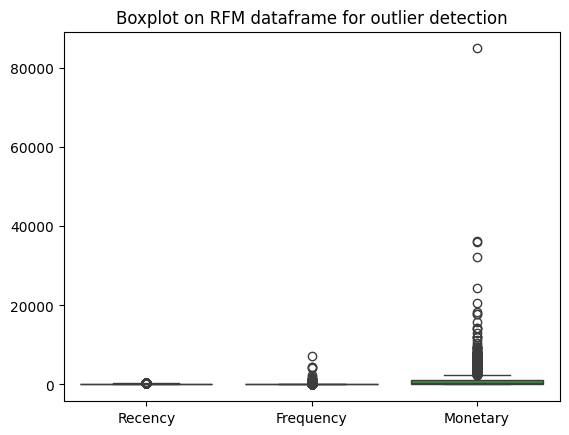

In [ ]:
#Checking for outliers in the rfm dataframe
sns.boxplot(data=rfm_df[rfm_cols])
plt.title('Boxplot on RFM dataframe for outlier detection')
plt.show()

In [ ]:
#shape of the dataframe before removing outliers
rfm_df.shape

(4192, 3)

In [ ]:
# Remove outliers for each column in rfm_df
for col in rfm_cols:
    rfm_df = remove_outliers(rfm_df, col)

In [ ]:
rfm_df.shape

(3426, 3)

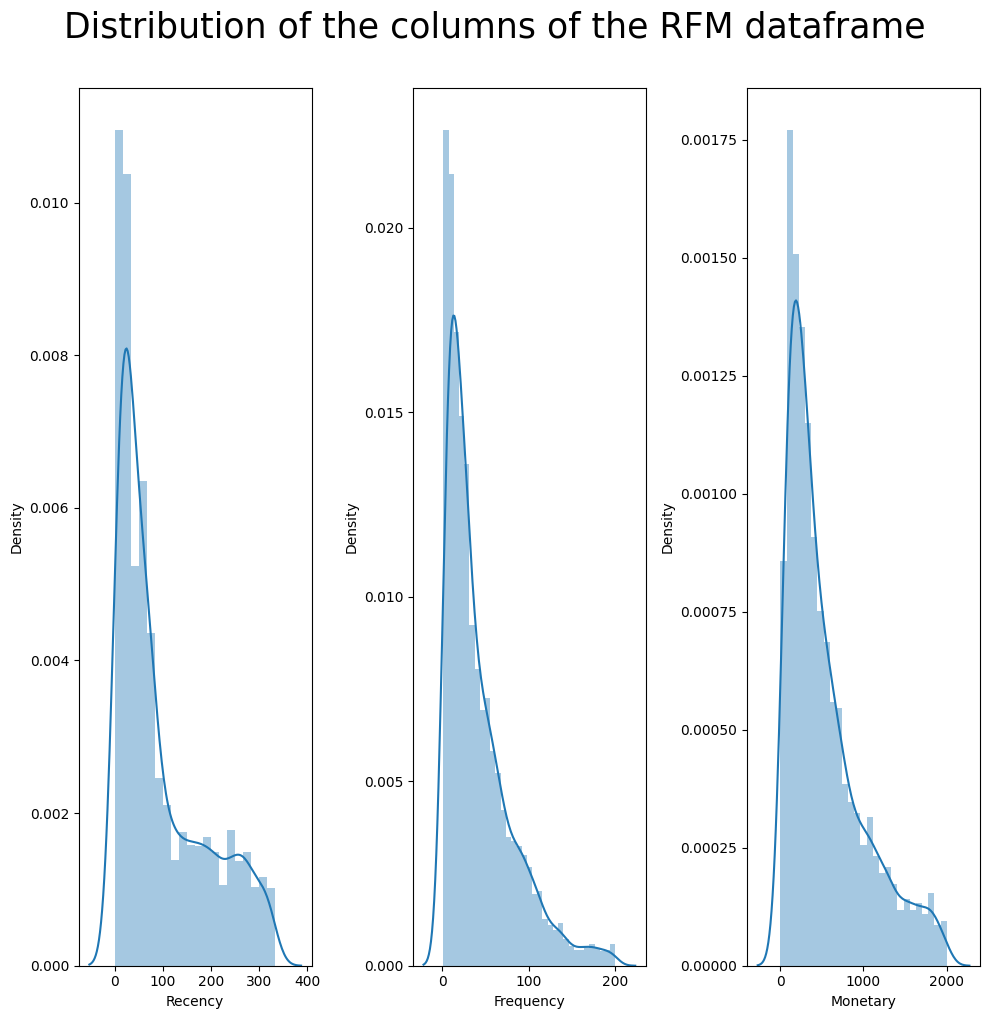

In [ ]:

#Plotting the distribution of the columns of the RFM dataframe
plt.figure(figsize=(10,10))
plt.suptitle('Distribution of the columns of the RFM dataframe',va='bottom',size=25)
for index, item in enumerate(rfm_cols):
  plt.subplot(1,3,index+1)
  sns.distplot(rfm_df[item])
plt.tight_layout()

## **Pre Processing the Data:**

**Feature Scaling** is a technique to standardize the independent features present in the data in a fixed range. It is performed during the data pre-processing to handle highly varying magnitudes or values or units. If feature scaling is not done, then a machine learning algorithm tends to weigh greater values, higher and consider smaller values as the lower values, regardless of the unit of the values.

In [ ]:
#Scaling and normalising the data
scaler = StandardScaler()
normaliser = Normalizer()
rfm_scaled = scaler.fit_transform(rfm_df)
rfm_scaled = normaliser.fit_transform(rfm_scaled)

In [ ]:
#Shape of scaled data
rfm_scaled.shape

(3426, 3)

## **Model implementation:**
Machine learning models can be described as programs that are trained to find patterns or trends within data and predict the result for new data.

In this project we are dealing with an unlabelled dataset and a clustering problem, therefore we'll be using some unsupervised algorithms.

In this project we will be including the following models:

K Means.

K means with elbow method.

Hierarchical clustering (Agglomerative).

DBScan clustering.

# **K Means**

k-means model is an unsupervised machine learning algorithm. k-means clustering is a method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster.

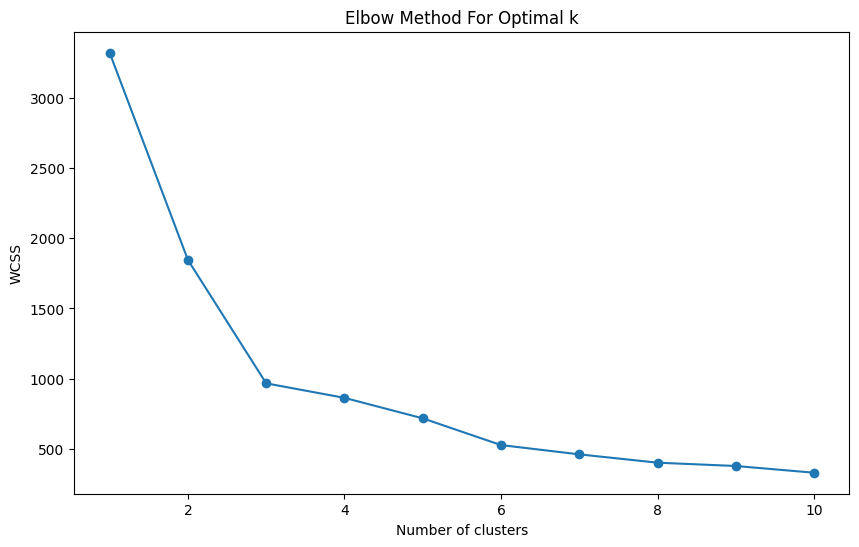

In [ ]:
# Determine the optimal number of clusters
WCSS= []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    WCSS.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), WCSS, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Assuming the optimal number of clusters is 3 from the Elbow Method
optimal_clusters = 3

# Training the KMeans model
kmeans_model = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=1000, random_state=0)
cluster_labels = kmeans_model.fit_predict(rfm_scaled)

# Adding cluster labels to the original dataframe
rfm_df['Cluster'] = cluster_labels

# Evaluate the clustering with Silhouette Score
silhouette_avg = silhouette_score(rfm_scaled, cluster_labels)
print(f'Silhouette Score for k={optimal_clusters}: {silhouette_avg}')





Silhouette Score for k=3: 0.5233813538947185


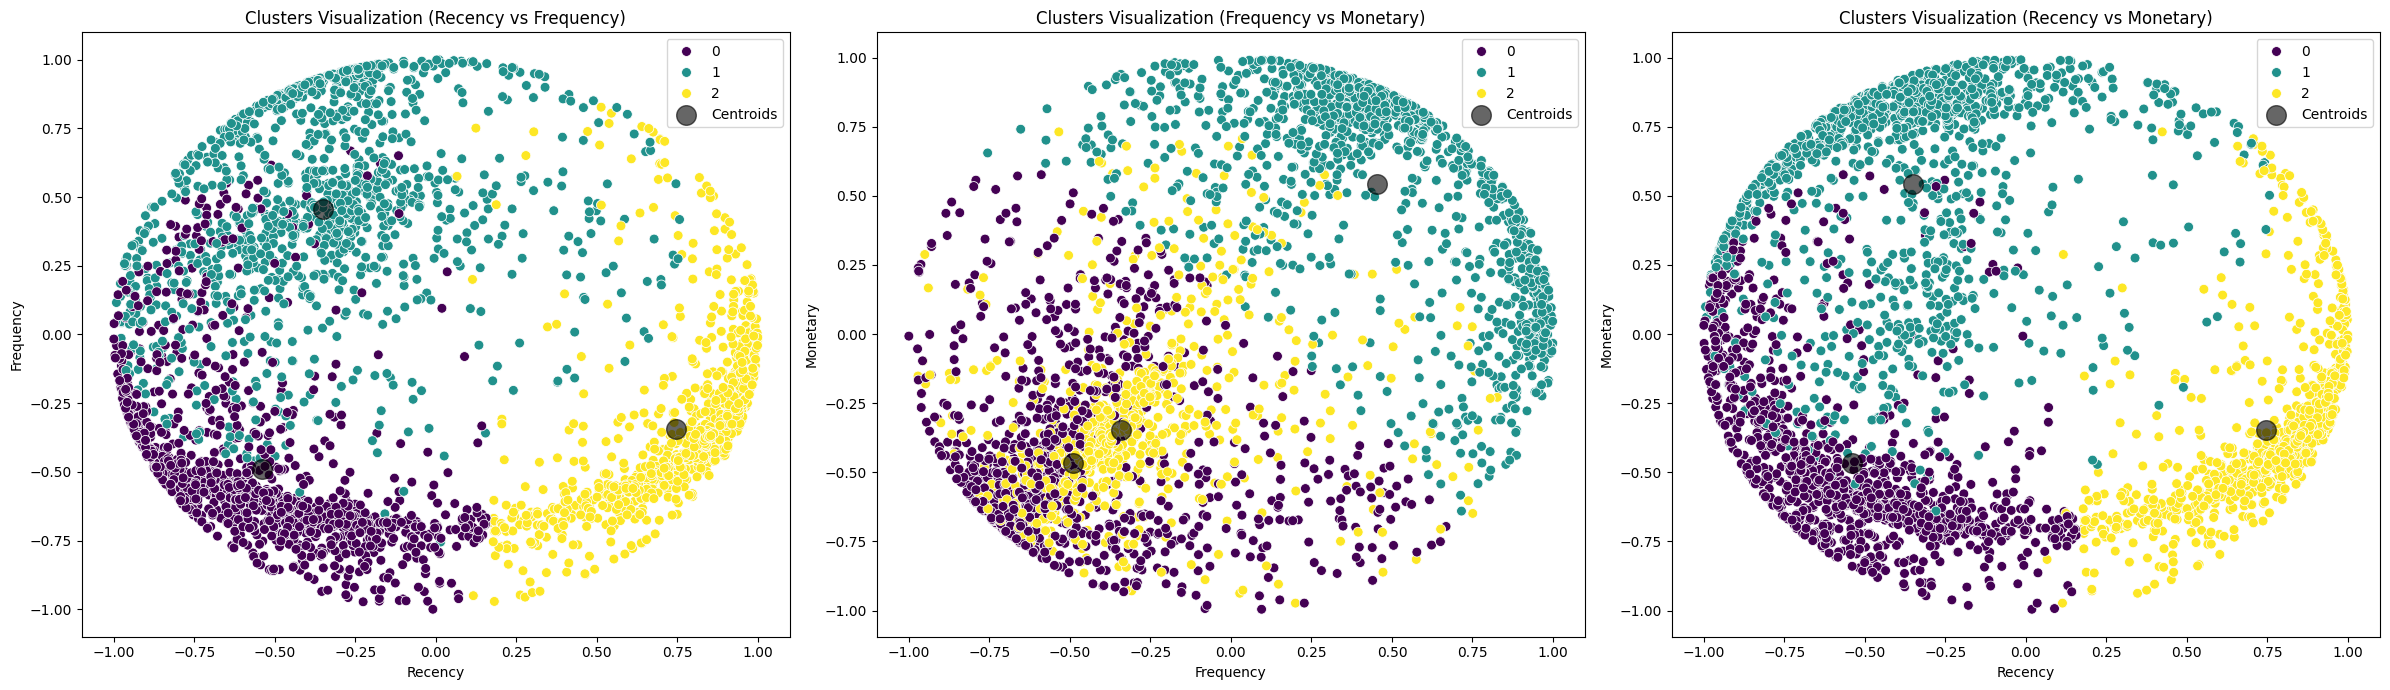

In [ ]:
# Plotting clusters for all pairs of RFM dimensions
fig, ax = plt.subplots(1, 3, figsize=(24, 7))

# Recency vs Frequency
sns.scatterplot(x=rfm_scaled[:, 0], y=rfm_scaled[:, 1], hue=cluster_labels, palette='viridis', ax=ax[0], s=50)
ax[0].scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 1], c='black', s=200, alpha=0.6, label='Centroids')
ax[0].set_title('Clusters Visualization (Recency vs Frequency)')
ax[0].set_xlabel('Recency')
ax[0].set_ylabel('Frequency')
ax[0].legend()

# Frequency vs Monetary
sns.scatterplot(x=rfm_scaled[:, 1], y=rfm_scaled[:, 2], hue=cluster_labels, palette='viridis', ax=ax[1], s=50)
ax[1].scatter(kmeans_model.cluster_centers_[:, 1], kmeans_model.cluster_centers_[:, 2], c='black', s=200, alpha=0.6, label='Centroids')
ax[1].set_title('Clusters Visualization (Frequency vs Monetary)')
ax[1].set_xlabel('Frequency')
ax[1].set_ylabel('Monetary')
ax[1].legend()

# Recency vs Monetary
sns.scatterplot(x=rfm_scaled[:, 0], y=rfm_scaled[:, 2], hue=cluster_labels, palette='viridis', ax=ax[2], s=50)
ax[2].scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 2], c='black', s=200, alpha=0.6, label='Centroids')
ax[2].set_title('Clusters Visualization (Recency vs Monetary)')
ax[2].set_xlabel('Recency')
ax[2].set_ylabel('Monetary')
ax[2].legend()

plt.tight_layout()
plt.show()


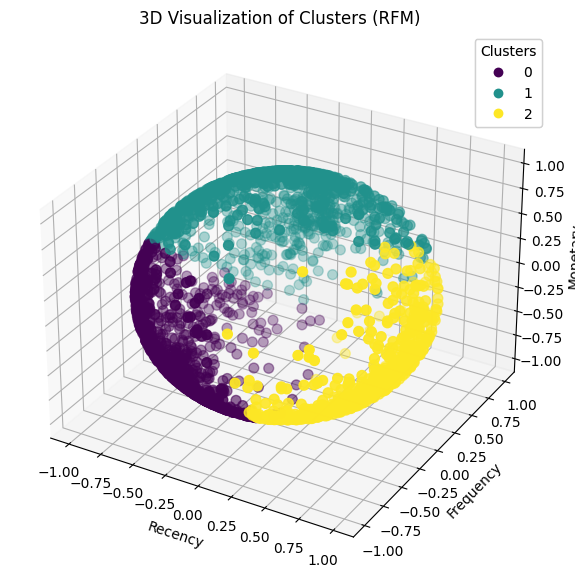

In [ ]:
# 3D Visualization of Clusters
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(rfm_scaled[:, 0], rfm_scaled[:, 1], rfm_scaled[:, 2], c=cluster_labels, s=50, cmap='viridis')
ax.set_title('3D Visualization of Clusters (RFM)')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)
plt.show()

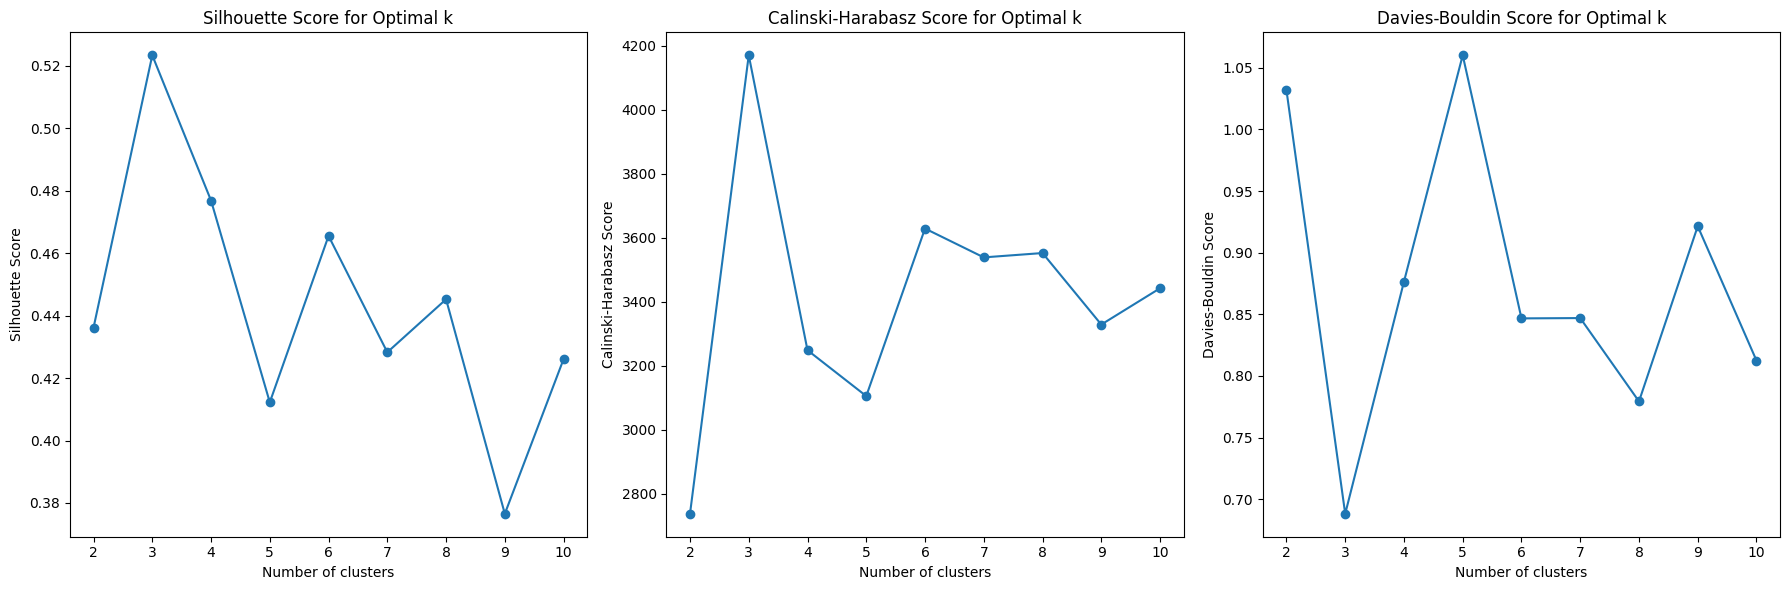

In [ ]:
# Function to evaluate K-Means clustering
def evaluate_kmeans(data, max_clusters):
    silhouette_scores = []
    ch_scores = []
    db_scores = []

    for k in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        cluster_labels = kmeans.fit_predict(data)

        silhouette_scores.append(silhouette_score(data, cluster_labels))
        ch_scores.append(calinski_harabasz_score(data, cluster_labels))
        db_scores.append(davies_bouldin_score(data, cluster_labels))

    return silhouette_scores, ch_scores, db_scores

# Set maximum number of clusters to evaluate
max_clusters = 10
silhouette_scores, ch_scores, db_scores = evaluate_kmeans(rfm_scaled, max_clusters)

# Plot evaluation metrics
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

ax[0].plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
ax[0].set_title('Silhouette Score for Optimal k')
ax[0].set_xlabel('Number of clusters')
ax[0].set_ylabel('Silhouette Score')

ax[1].plot(range(2, max_clusters + 1), ch_scores, marker='o')
ax[1].set_title('Calinski-Harabasz Score for Optimal k')
ax[1].set_xlabel('Number of clusters')
ax[1].set_ylabel('Calinski-Harabasz Score')

ax[2].plot(range(2, max_clusters + 1), db_scores, marker='o')
ax[2].set_title('Davies-Bouldin Score for Optimal k')
ax[2].set_xlabel('Number of clusters')
ax[2].set_ylabel('Davies-Bouldin Score')

plt.tight_layout()
plt.show()


# **Cluster profiling for KMeans with 3 clusters.**

            Recency  Frequency     Monetary  Cluster Size
Cluster                                                  
0         45.620168  81.186555  1025.037648          1190
1        217.213294  20.368056   267.428175          1008
2         43.552117  20.504886   281.493210          1228


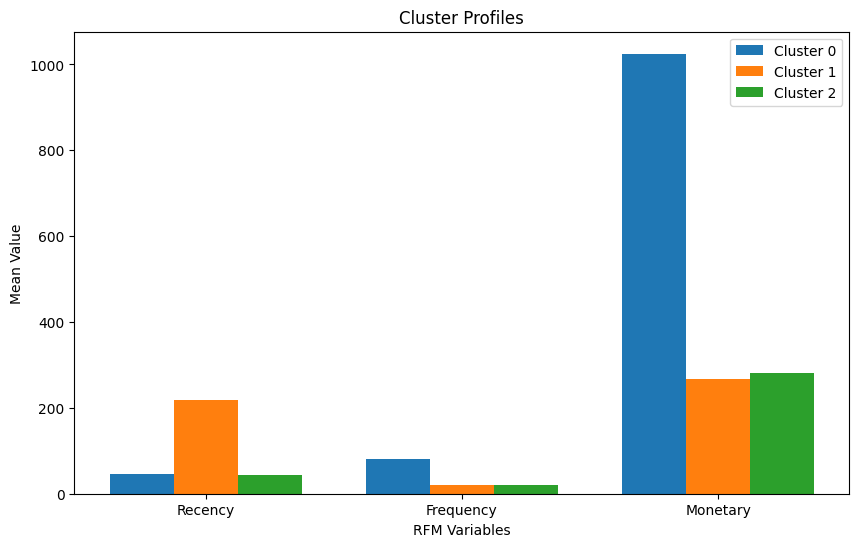

Best Cluster: 0
Worst Cluster: 1


In [ ]:
# Fit the K-Means model
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
rfm_df['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Cluster profiling
cluster_profile = rfm_df.groupby('Cluster').mean()
cluster_profile['Cluster Size'] = rfm_df['Cluster'].value_counts().sort_index()

print(cluster_profile)

# Visualize the cluster profiles
plt.figure(figsize=(10, 6))
bar_width = 0.25
for i in range(optimal_clusters):
    plt.bar(np.arange(3) + bar_width * i, cluster_profile.iloc[i, :3], bar_width, label=f'Cluster {i}')
plt.xticks(np.arange(3) + bar_width, ['Recency', 'Frequency', 'Monetary'])
plt.xlabel('RFM Variables')
plt.ylabel('Mean Value')
plt.title('Cluster Profiles')
plt.legend()
plt.show()



# Identify best and worst clusters
# Assuming best cluster has high Frequency and Monetary, and low Recency
best_cluster = cluster_profile[['Recency', 'Frequency', 'Monetary']].apply(
    lambda row: row['Frequency'] + row['Monetary'] - row['Recency'], axis=1).idxmax()

# Assuming worst cluster has low Frequency and Monetary, and high Recency
worst_cluster = cluster_profile[['Recency', 'Frequency', 'Monetary']].apply(
    lambda row: row['Recency'] - row['Frequency'] - row['Monetary'], axis=1).idxmax()

print(f'Best Cluster: {best_cluster}')
print(f'Worst Cluster: {worst_cluster}')


# **Hierarchical clustering**

Hierarchical clustering is another unsupervised machine learning algorithm, which is used to group the unlabeled datasets into a cluster and also known as hierarchical cluster analysis or HCA.

In this algorithm, we develop the hierarchy of clusters in the form of a tree, and this tree-shaped structure is known as the dendrogram.

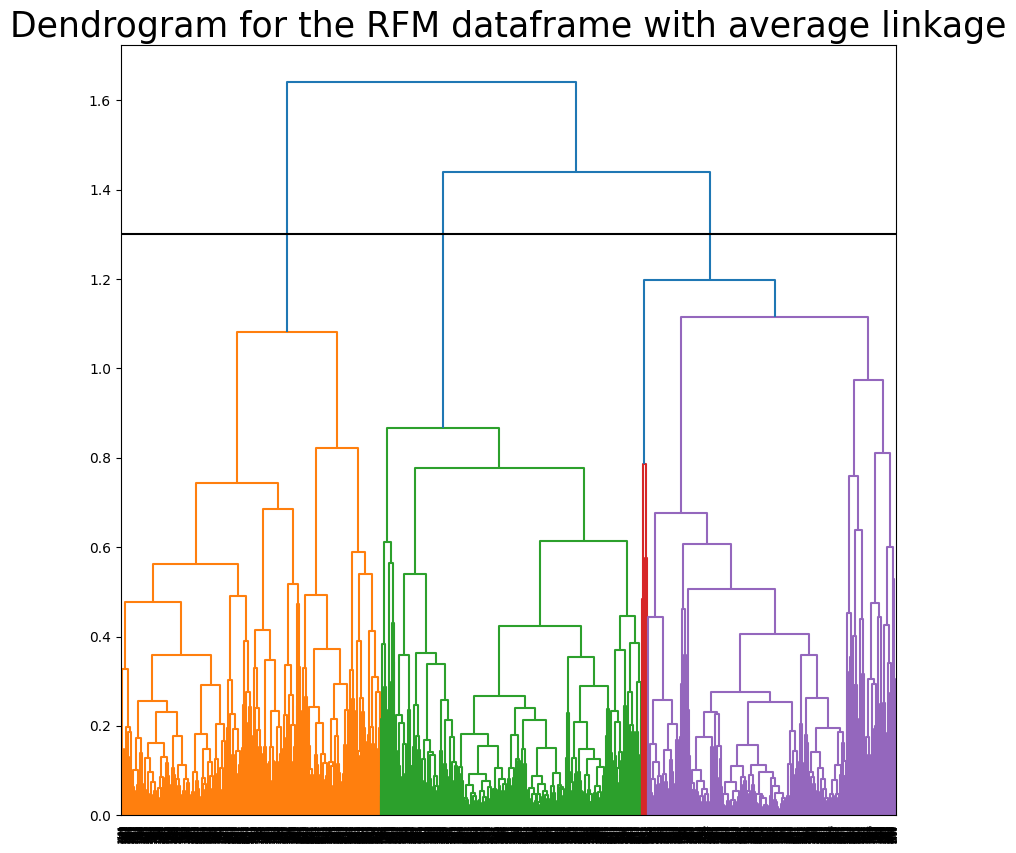

In [ ]:
#Getting the number of clusters using dendogram
plt.figure(figsize=(10,10))
merging = linkage(rfm_scaled,method='average',metric='euclidean')
dendrogram(merging)
plt.title('Dendrogram for the RFM dataframe with average linkage',size=25)

#Cutting the dendrogram at the longest vertical line without being cut by a horizontal line
plt.axhline(y=1.3,c='k')
plt.show()

# **From Dendogram we get to know the optimum number of clusters are 3**

Hierarchical clustering has 2 types:

1.Agglomerative Clustering

2.Divisive Clustering

In this project I'll perform Agglomerative clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Applying Agglomerative Clustering
agglo_model = AgglomerativeClustering(n_clusters=3, linkage='average', metric='euclidean')
rfm_df['Cluster'] = agglo_model.fit_predict(rfm_scaled)

# Cluster profiling
cluster_profile = rfm_df.groupby('Cluster').mean()
cluster_profile['Cluster Size'] = rfm_df['Cluster'].value_counts().sort_index()

print(cluster_profile)

            Recency  Frequency    Monetary  Cluster Size
Cluster                                                 
0        209.316726  23.835409  310.906343          1124
1         37.689565  81.520000  995.206105          1150
2         41.758681  18.909722  296.085340          1152


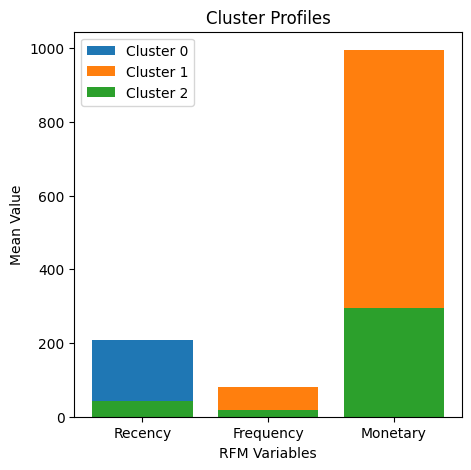

Best Cluster: 1
Worst Cluster: 0


In [ ]:
# Visualize the cluster profiles
plt.figure(figsize=(5, 5))
colors = ['tab:blue', 'tab:orange', 'tab:green']
for i in range(optimal_clusters):
    plt.bar(x=range(3), height=cluster_profile.iloc[i, :3], color=colors[i], label=f'Cluster {i}')
plt.xticks(range(3), ['Recency', 'Frequency', 'Monetary'])
plt.xlabel('RFM Variables')
plt.ylabel('Mean Value')
plt.title('Cluster Profiles')
plt.legend()
plt.show()

# Identify best and worst clusters
# Assuming best cluster has high Frequency and Monetary, and low Recency
best_cluster = cluster_profile[['Recency', 'Frequency', 'Monetary']].apply(
    lambda row: row['Frequency'] + row['Monetary'] - row['Recency'], axis=1).idxmax()

# Assuming worst cluster has low Frequency and Monetary, and high Recency
worst_cluster = cluster_profile[['Recency', 'Frequency', 'Monetary']].apply(
    lambda row: row['Recency'] - row['Frequency'] - row['Monetary'], axis=1).idxmax()

print(f'Best Cluster: {best_cluster}')
print(f'Worst Cluster: {worst_cluster}')

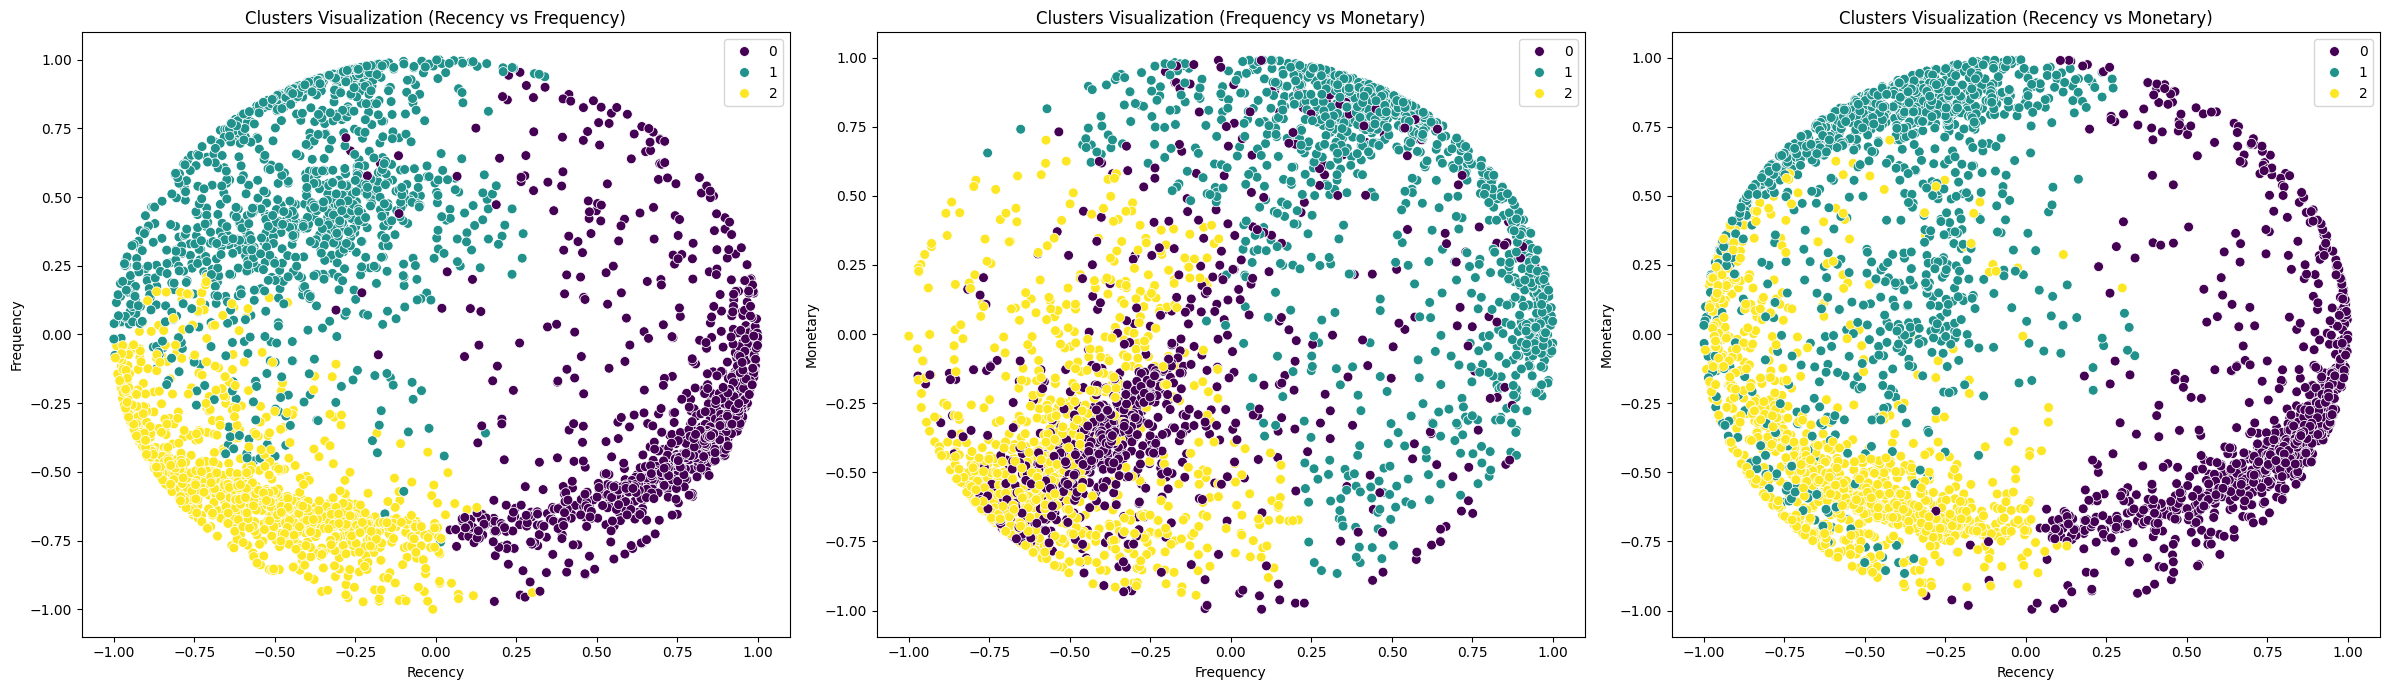

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Assuming rfm_scaled is your scaled RFM dataset
agglo_model = AgglomerativeClustering(n_clusters=3, linkage='average', metric='euclidean')
agglo_labels = agglo_model.fit_predict(rfm_scaled)

# Plotting clusters for all pairs of RFM dimensions
fig, ax = plt.subplots(1, 3, figsize=(24, 7))

# Recency vs Frequency
sns.scatterplot(x=rfm_scaled[:, 0], y=rfm_scaled[:, 1], hue=agglo_labels, palette='viridis', ax=ax[0], s=50)
ax[0].set_title('Clusters Visualization (Recency vs Frequency)')
ax[0].set_xlabel('Recency')
ax[0].set_ylabel('Frequency')

# Frequency vs Monetary
sns.scatterplot(x=rfm_scaled[:, 1], y=rfm_scaled[:, 2], hue=agglo_labels, palette='viridis', ax=ax[1], s=50)
ax[1].set_title('Clusters Visualization (Frequency vs Monetary)')
ax[1].set_xlabel('Frequency')
ax[1].set_ylabel('Monetary')

# Recency vs Monetary
sns.scatterplot(x=rfm_scaled[:, 0], y=rfm_scaled[:, 2], hue=agglo_labels, palette='viridis', ax=ax[2], s=50)
ax[2].set_title('Clusters Visualization (Recency vs Monetary)')
ax[2].set_xlabel('Recency')
ax[2].set_ylabel('Monetary')

plt.tight_layout()
plt.show()


In [ ]:
# Evaluating Agglomerative Clustering performance
unique_clusters = np.unique(agglo_labels)
if len(unique_clusters) > 1:
    silhouette_avg = silhouette_score(rfm_scaled, agglo_labels)
    calinski_harabasz = calinski_harabasz_score(rfm_scaled, agglo_labels)
    davies_bouldin = davies_bouldin_score(rfm_scaled, agglo_labels)
    print(f'Silhouette Score: {silhouette_avg}')
    print(f'Calinski-Harabasz Index: {calinski_harabasz}')
    print(f'Davies-Bouldin Index: {davies_bouldin}')
else:
    print("Agglomerative Clustering did not find enough clusters to compute evaluation metrics.")



Silhouette Score: 0.49581156711609203
Calinski-Harabasz Index: 3616.1645379260995
Davies-Bouldin Index: 0.7118183809778085


# **DBSCAN**

DBSCAN is a density-based clustering algorithm that groups data points based on their density in the feature space. It identifies clusters as dense regions separated by areas of lower density and is robust to noise and outliers. It doesn't require specifying the number of clusters in advance. Its parameters include the radius (Eps) and minimum number of points (MinPts) to form a core point.

In [ ]:
from sklearn.cluster import DBSCAN


In [ ]:
# Run DBSCAN
dbscan_model = DBSCAN(eps=0.6, min_samples=760)
dbscan_labels = dbscan_model.fit_predict(rfm_scaled)

# Print number of clusters found (excluding noise)
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print(f'Number of clusters found: {n_clusters}')


Number of clusters found: 2


Silhouette Score: 0.497433238703058
Calinski-Harabasz Index: 3587.741801725737
Davies-Bouldin Index: 0.7285671777765232


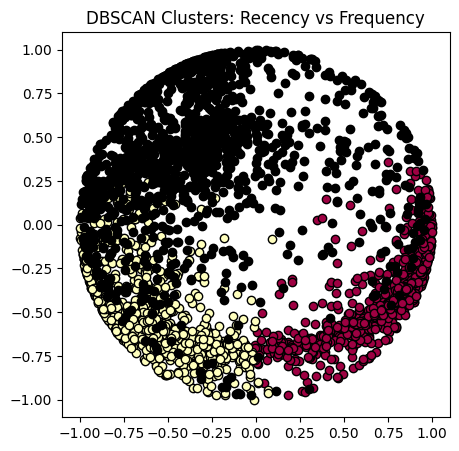

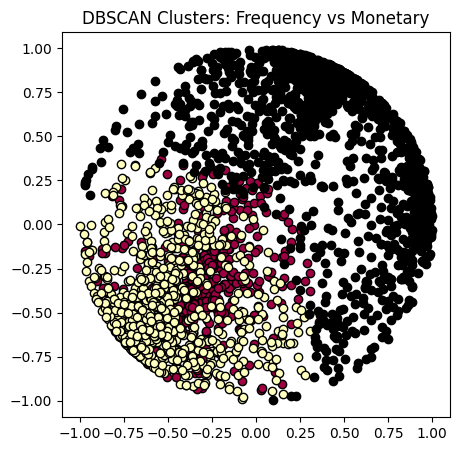

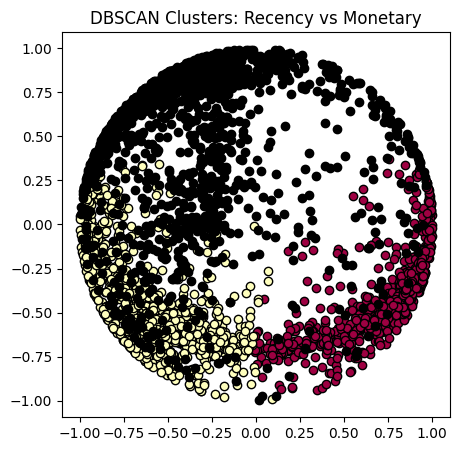

In [ ]:
# Evaluating DBSCAN performance
unique_clusters = np.unique(dbscan_labels)
if len(unique_clusters) > 1:
    silhouette_avg = silhouette_score(rfm_scaled, dbscan_labels)
    calinski_harabasz = calinski_harabasz_score(rfm_scaled, dbscan_labels)
    davies_bouldin = davies_bouldin_score(rfm_scaled, dbscan_labels)
    print(f'Silhouette Score: {silhouette_avg}')
    print(f'Calinski-Harabasz Index: {calinski_harabasz}')
    print(f'Davies-Bouldin Index: {davies_bouldin}')
else:
    print("DBSCAN did not find enough clusters to compute evaluation metrics.")

# Plotting function for DBSCAN clusters
def plot_dbscan_clusters(data, labels, title):
    plt.figure(figsize=(5, 5))
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = (labels == k)

        xy = data[class_member_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)

    plt.title(title)
    plt.show()

# Visualize Recency vs Frequency
plot_dbscan_clusters(rfm_scaled[:, [0, 1]], dbscan_labels, "DBSCAN Clusters: Recency vs Frequency")

# Visualize Frequency vs Monetary
plot_dbscan_clusters(rfm_scaled[:, [1, 2]], dbscan_labels, "DBSCAN Clusters: Frequency vs Monetary")

# Visualize Recency vs Monetary
plot_dbscan_clusters(rfm_scaled[:, [0, 2]], dbscan_labels, "DBSCAN Clusters: Recency vs Monetary")




# **Conclusion:**

**EDA Insights:**

1.   The product 'White hanging heart t-light holder' is the most frequently ordered product, around 1700 times. 'Jumbo bag red retrospot' is the second most ordered product, around 1300 times.
2.   The product 'Pack of 72 retrospot cake cases' has the most quantity ordered, around 15,000 units. 'Assorted colour bird ornament' is second with around 13,000 units ordered.

3.   The product "Product Bunting" has made the most money, around 35,000 sterling. "White Hanging heart T-light holder" being the second, which has made around 32,000 sterling.

4.   The customer with the ID: 12748 has the highest number of orders and the customer with the ID: 14646 has the lowest number of orders.
5.   United Kingdom has the most orders placed, with around 3 lakh orders. Germany being second, but way less than United Kingdom


6.  Most orders are made in the 12th hour, i.e 12pm to 1pm, and the least orders are made in the 6th hour, i.e 6am to 7am.


7.   The 6th day of the month has the highest number of orders and the 31st day has the lowest.
8.   Most of the orders are made on Thurday,around 66 thousand, and the least number of orders are made on Friday, around 46 thousand

9.   The most number of orders are made in the 11th month, i.e November, and the least in the 2nd month, i.e February.










# **Results from Model Implementation:**

1.   K-Means with optimal clusters = 3 , performed best with a Silhoutte score of 0.5233813538947185
and while cluster profiling , Cluster 2 is the best cluster and cluster 1 is the worst.

2.   Hierarchial Clustering : Dendogram results suggests 3 clusters
and while performing Agglomerative Clustering on 3 clusters got a Silhouette Score: 0.49581156711609203
and while cluster profiling, Cluster 1 is best cluster and cluster 0 is worst.

3.  DBSCAN Clustering : No. Of Cluster got is 2 exluding NOISE, and with a  Silhouette Score: 0.497433238703058



